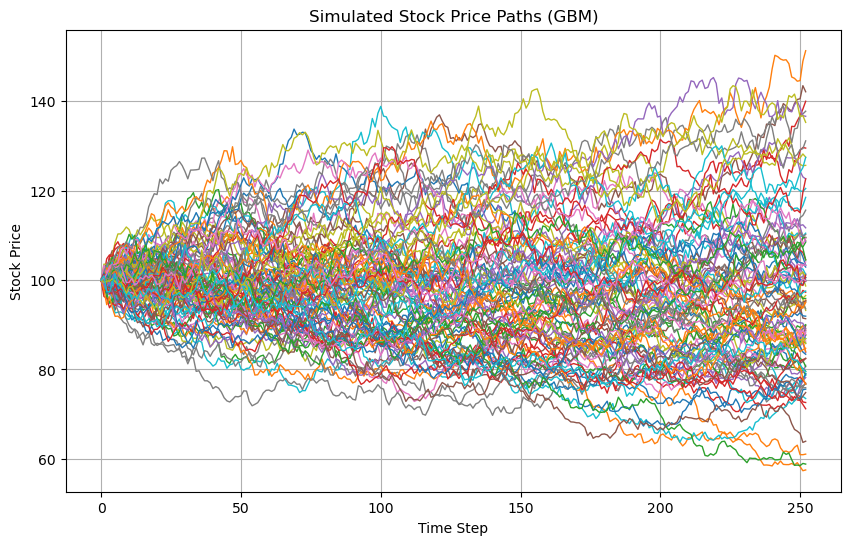

Expected stock price at T=1.0: 93.84
Estimated European Call Option Price: 2.13


In [51]:
import yfinance as yf
import numpy as np
import pandas as pd

# Get 1 year of daily price data
data = yf.download('AAPL', period='2y', interval='1d')
prices = data['Close'].astype(float)

if isinstance(prices, pd.DataFrame):
    # Select the first column if multiple columns exist
    prices = prices.iloc[:, 0]

log_returns = np.log(prices / prices.shift(1)).dropna()

mu_daily = log_returns.mean()
sigma_daily = log_returns.std()

trading_days = 252
mu_annual = mu_daily * trading_days
sigma_annual = sigma_daily * np.sqrt(trading_days)
print(f"Estimated annual drift (mu): {mu_annual:.4f}")
print(f"Estimated annual volatility (sigma): {sigma_annual:.4f}")

[*********************100%***********************]  1 of 1 completed

Estimated annual drift (mu): 0.0693
Estimated annual volatility (sigma): 0.2726


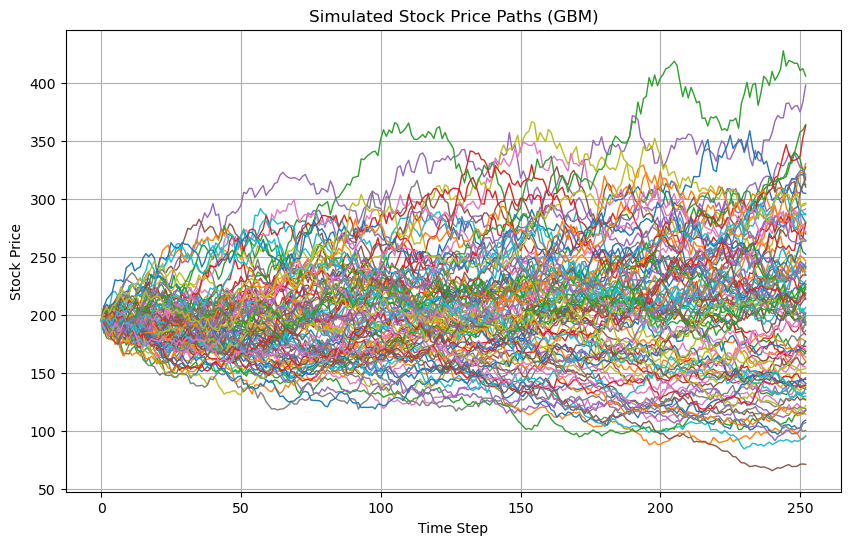

Expected stock price at T=1.0: 205.25
Estimated European Call Option Price: 32.50


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 195.27        # Initial stock price
mu = 0.052        # Expected return (drift) - replaced estimated Mu with risk free rate for interval 1y
sigma = 0.3287    # Volatility
T = 1.0          # Time horizon (1 year)
N = 252          # Number of time steps (trading days in a year)
dt = T / N       # Time step
M = 10000         # Number of simulations (Monte Carlo paths)

S = np.zeros((M, N + 1))
S[:, 0] = S0  # Set initial price for all paths

for t in range(1, N + 1):
    Z = np.random.standard_normal(M)  # M random draws
    S[:, t] = S[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

plt.figure(figsize=(10, 6))
for i in range(100):  # plot 10 sample paths
    plt.plot(S[i], lw=1)
plt.title('Simulated Stock Price Paths (GBM)')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

expected_price = np.mean(S[:, -1])
print(f"Expected stock price at T={T}: {expected_price:.2f}")

K = 190  # strike price
r = 0.05  # risk-free rate

payoffs = np.maximum(S[:, -1] - K, 0)
option_price = np.exp(-r * T) * np.mean(payoffs)
print(f"Estimated European Call Option Price: {option_price:.2f}")
